# About the data set

Data comes from an original (non-machine-learning) study : The Population Biology of Abalone (_Haliotis_ species) in Tasmania.
From the original data examples with missing values were removed, and the ranges of the continuous values have been scaled by dividing with 200.

# Variable discription
`Sex`: M (male), F (female), I (infant)

`Length`: longest shell measurement (in mm)

`Diameter`: measurement perpendicular to legnth (in mm)

`Height`: with meat in shell (in mm)

`Whole weight`: the whole abalone (in grams)

`Shucked weight`: weight of the meat (in grams)

`Viscera weight`: gut weight after bleeding (in grams)

`Shell weight`: after being dried (in grams)

`Rings`: + 1.5 gives the age in years (the value to predict)

In [197]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [126]:
df = pd.read_csv(r'E:\Data Trained studymaterial\Dataset\dataset1-master\dataset1-master\abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [127]:
df.shape

(4177, 9)

In [128]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [130]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [131]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [132]:
#Adding Target Column Age

df['Age'] = df.Rings + 1.5
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [91]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


# Data Visualization and EDA

In [133]:
#Checking Realtionship between target and labels through graphs

X = df.drop(columns=['Age'])
y = df['Age']

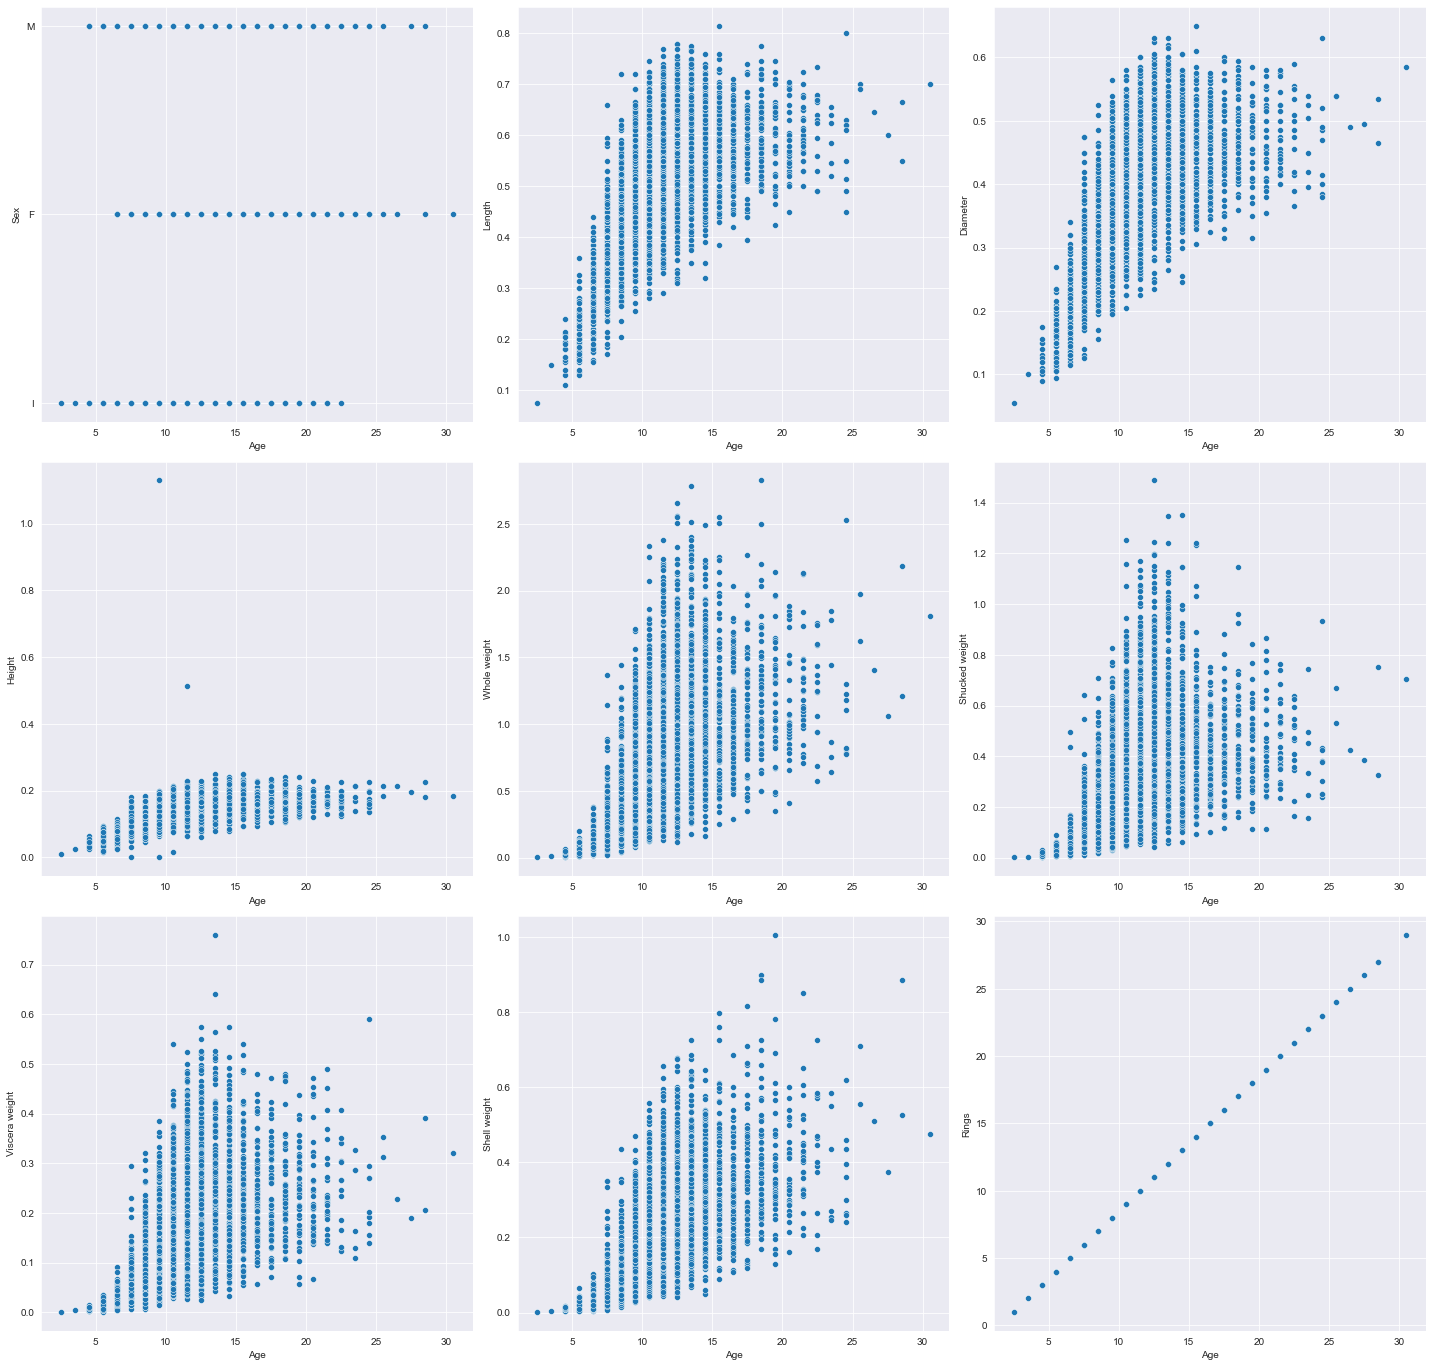

In [134]:


plt.figure(figsize=(20,25))

plotnumber=1

for column in X:
    if plotnumber<=12 : 
        ax=plt.subplot(4,3,plotnumber)
        sns.scatterplot(y,X[column])
        
    plotnumber+=1
plt.tight_layout()

# Conclusion :
1.) Age of Female is more as compared to Male and Infant
2.) As age increses Length ,Diameter, and other feature also increase
3.) Height is limited to only some extent
4.) In Given Dataset most Age occurs between 5 to 25 years

In [135]:
#Using Encoding Techniques
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['Sex'] = labelencoder_y.fit_transform(df['Sex'])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


I = 1 , F = 0 , M = 2

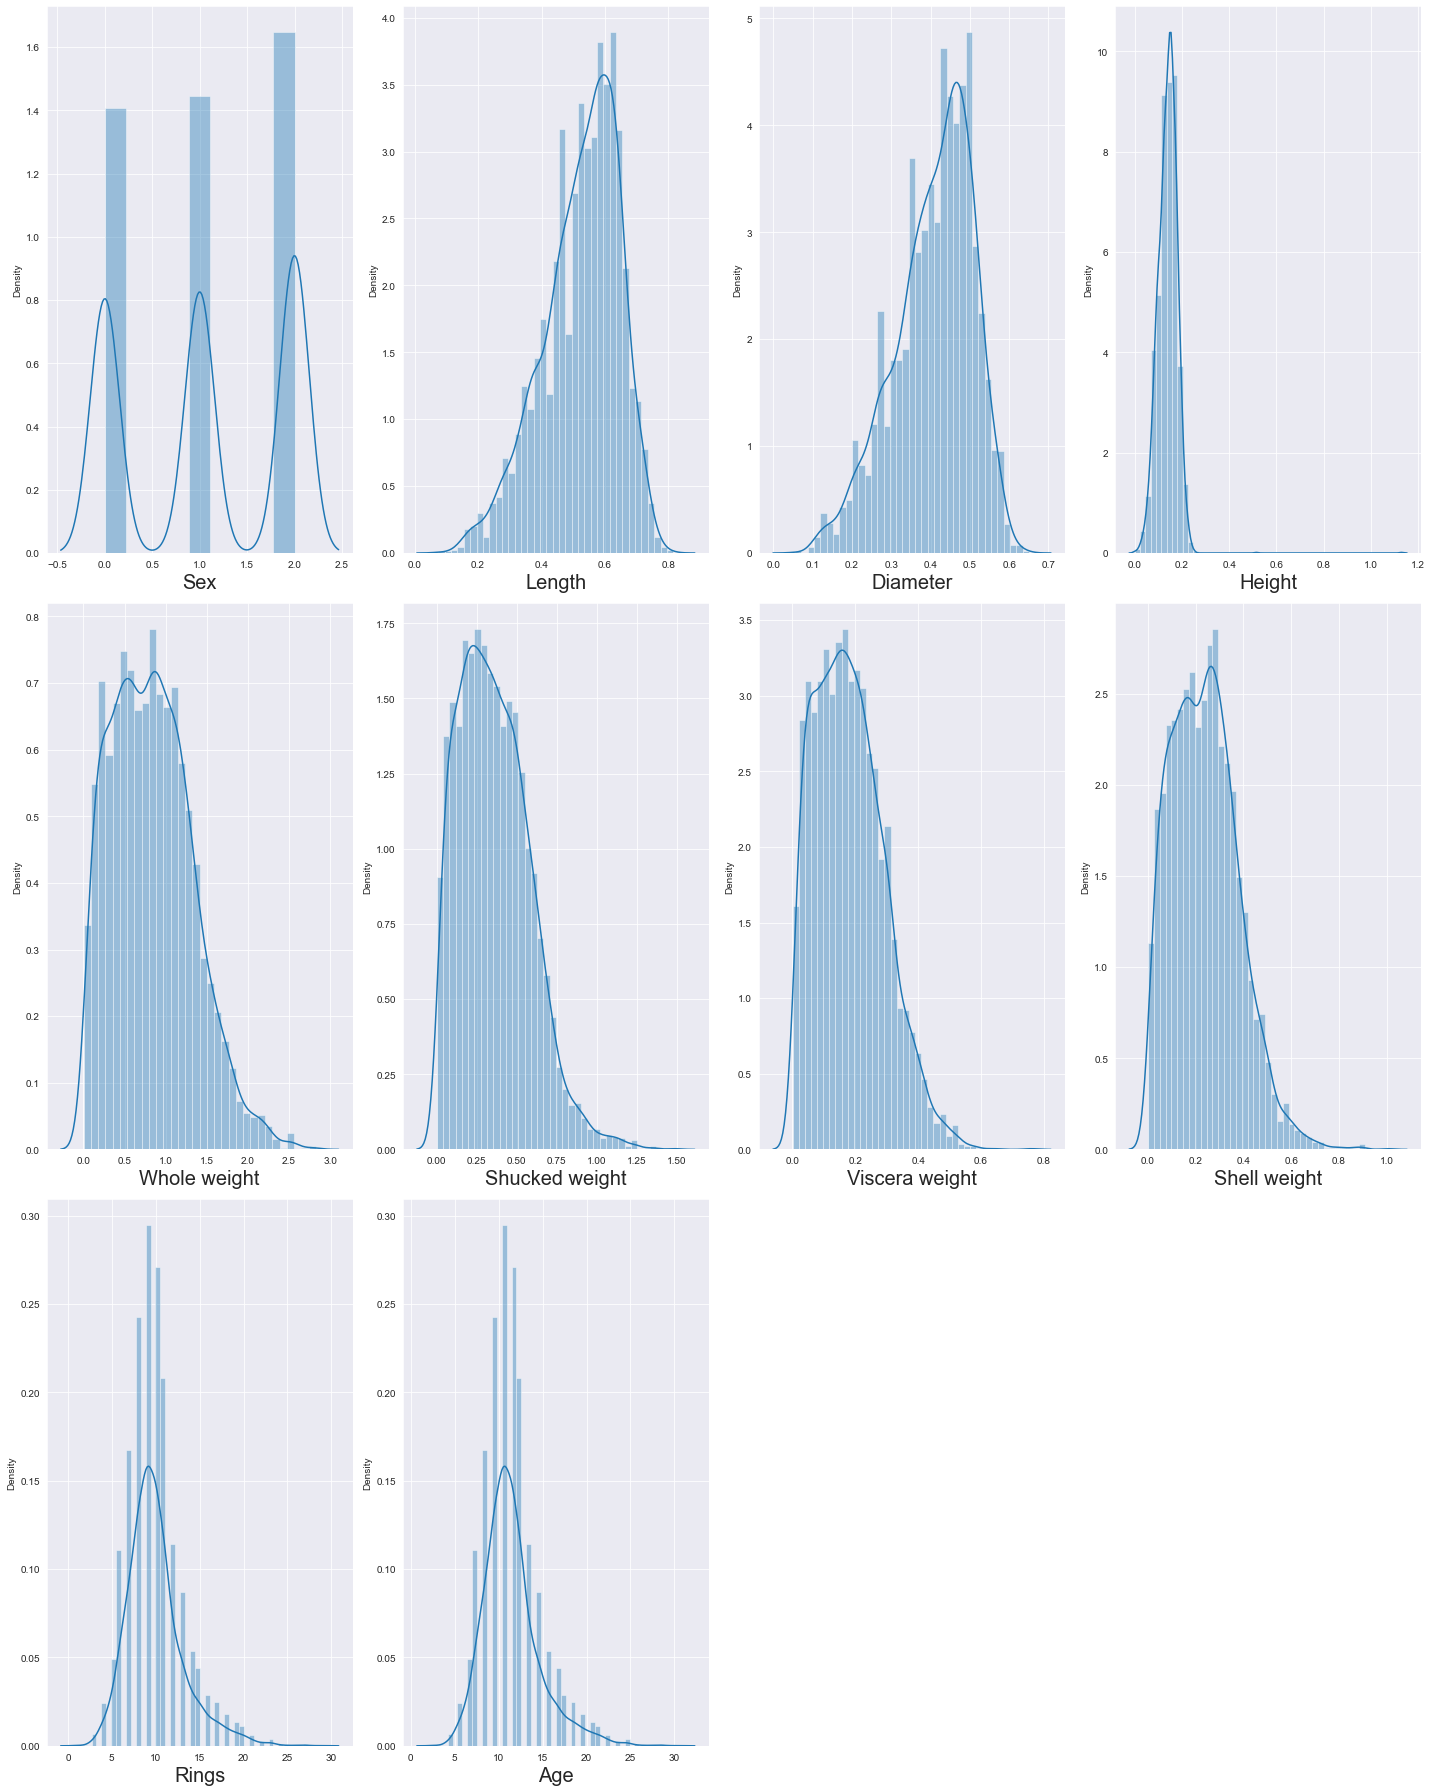

In [136]:
#Checking Data Distribution

plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=12 : 
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

There is skewness present in some features

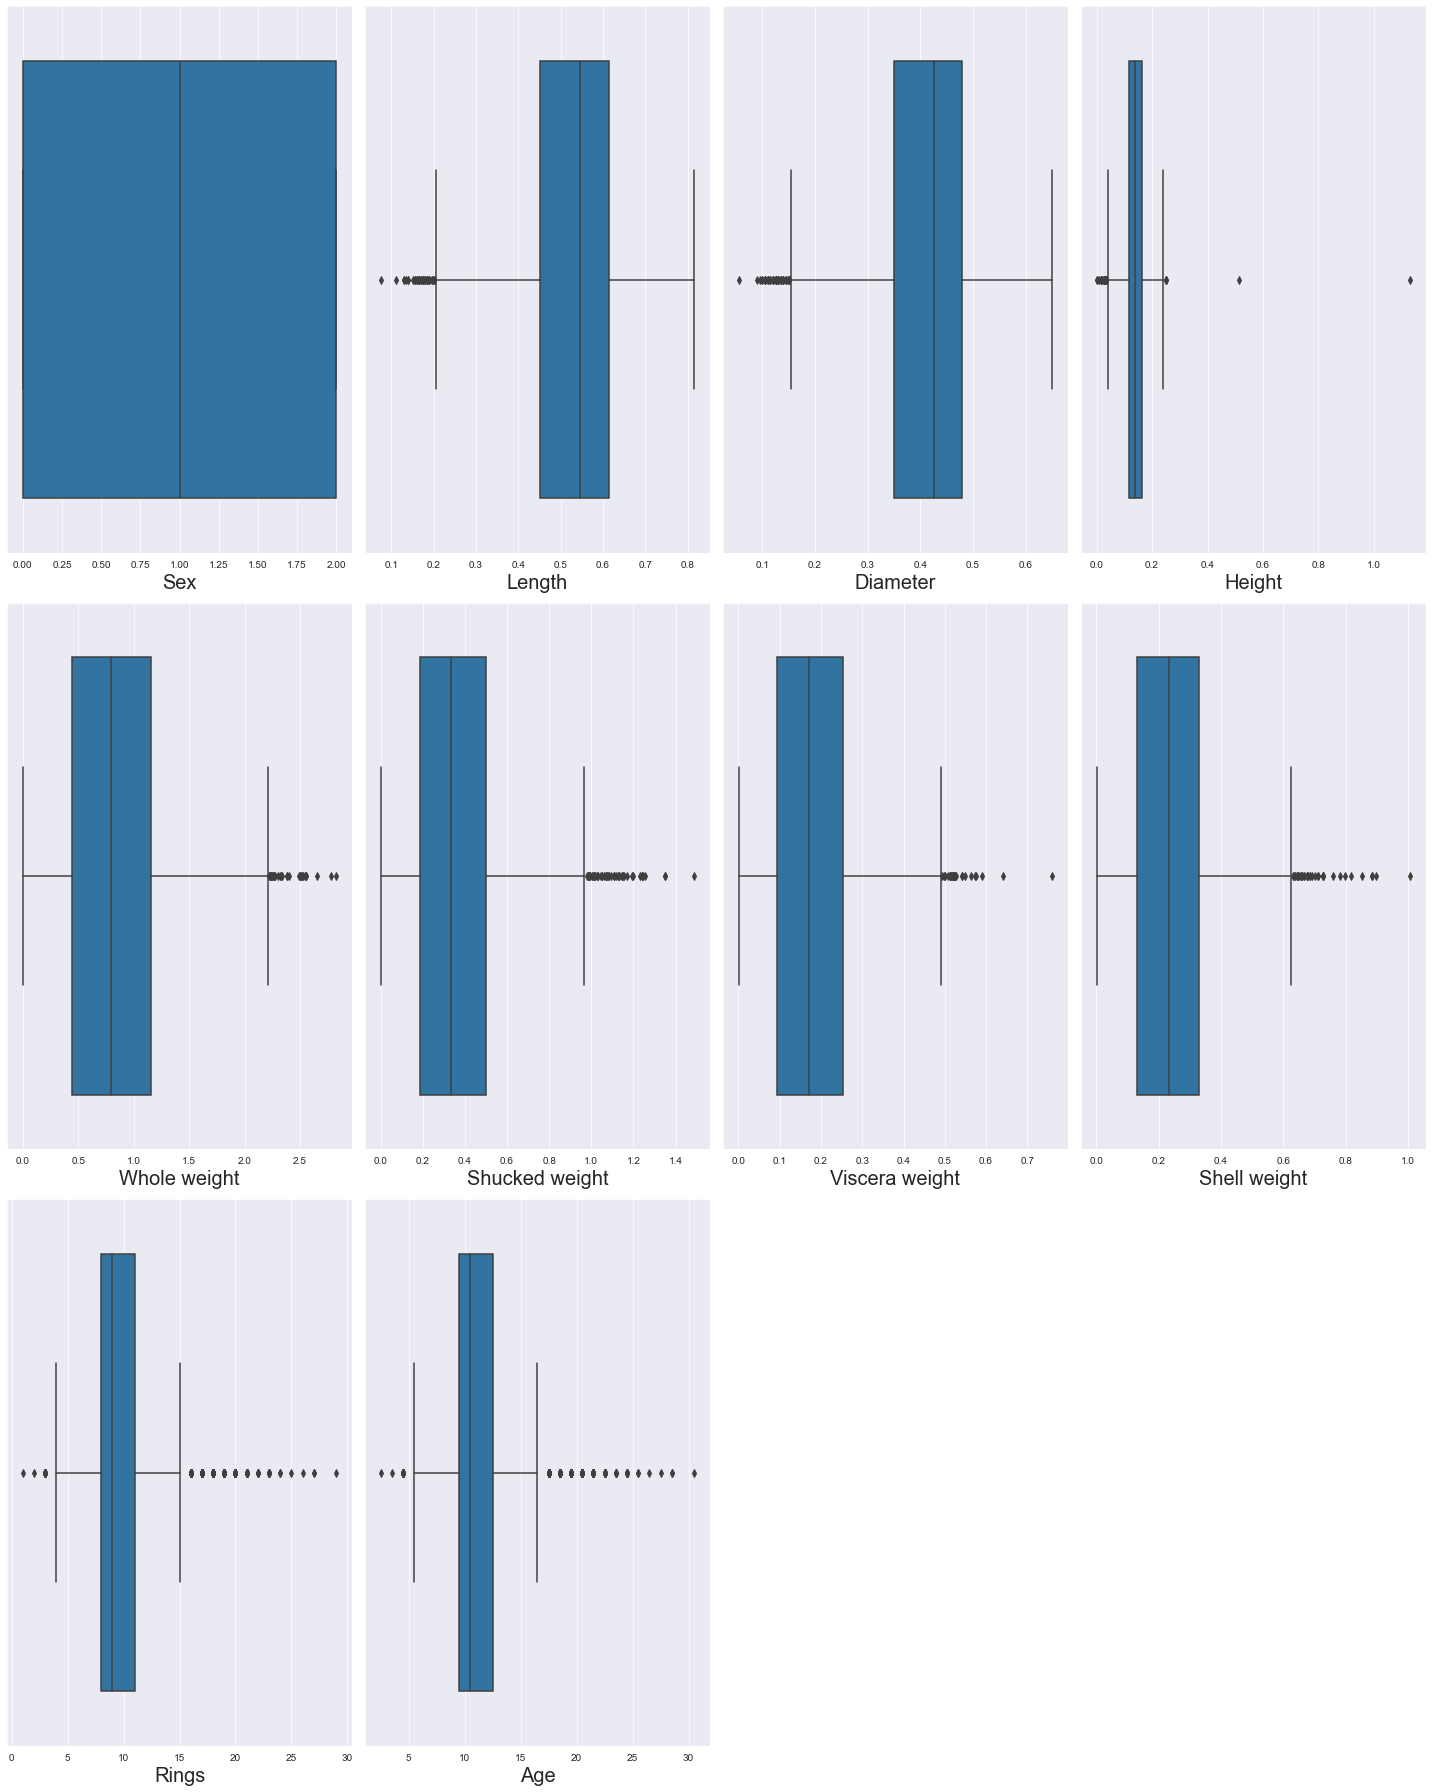

In [137]:
#Checking for Outliers using Box Plot
plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=12 : 
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# There are outliers present in feature which we need to remove

In [138]:
#Checking Correlation And Multicollinearity

df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


<AxesSubplot:>

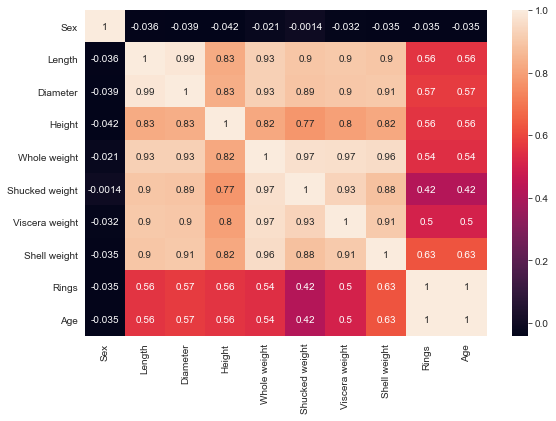

In [139]:
#HeatMap
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
corr = df.corr()
sns.heatmap(corr, annot=True)

# Conclusion - Rings and Age are highly Correlated so Dropping Column Rings

In [140]:
Df = df.drop(columns=['Rings'])


In [152]:
Df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [142]:
#Removing Outliers using quantile

q = Df['Length'].quantile(0.98)
data_cleaned = Df[Df['Length']<q]
q = data_cleaned['Diameter'].quantile(0.97)
data_cleaned = data_cleaned[data_cleaned['Diameter']<q]
q = data_cleaned['Height'].quantile(0.97)
data_cleaned = data_cleaned[data_cleaned['Height']<q]
q = data_cleaned['Whole weight'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['Whole weight']<q]
q = data_cleaned['Shucked weight'].quantile(0.98)
data_cleaned = data_cleaned[data_cleaned['Shucked weight']<q]
q = data_cleaned['Viscera weight'].quantile(0.97)
data_cleaned = data_cleaned[data_cleaned['Viscera weight']<q]
q = data_cleaned['Shell weight'].quantile(0.97)
data_cleaned = data_cleaned[data_cleaned['Shell weight']<q]


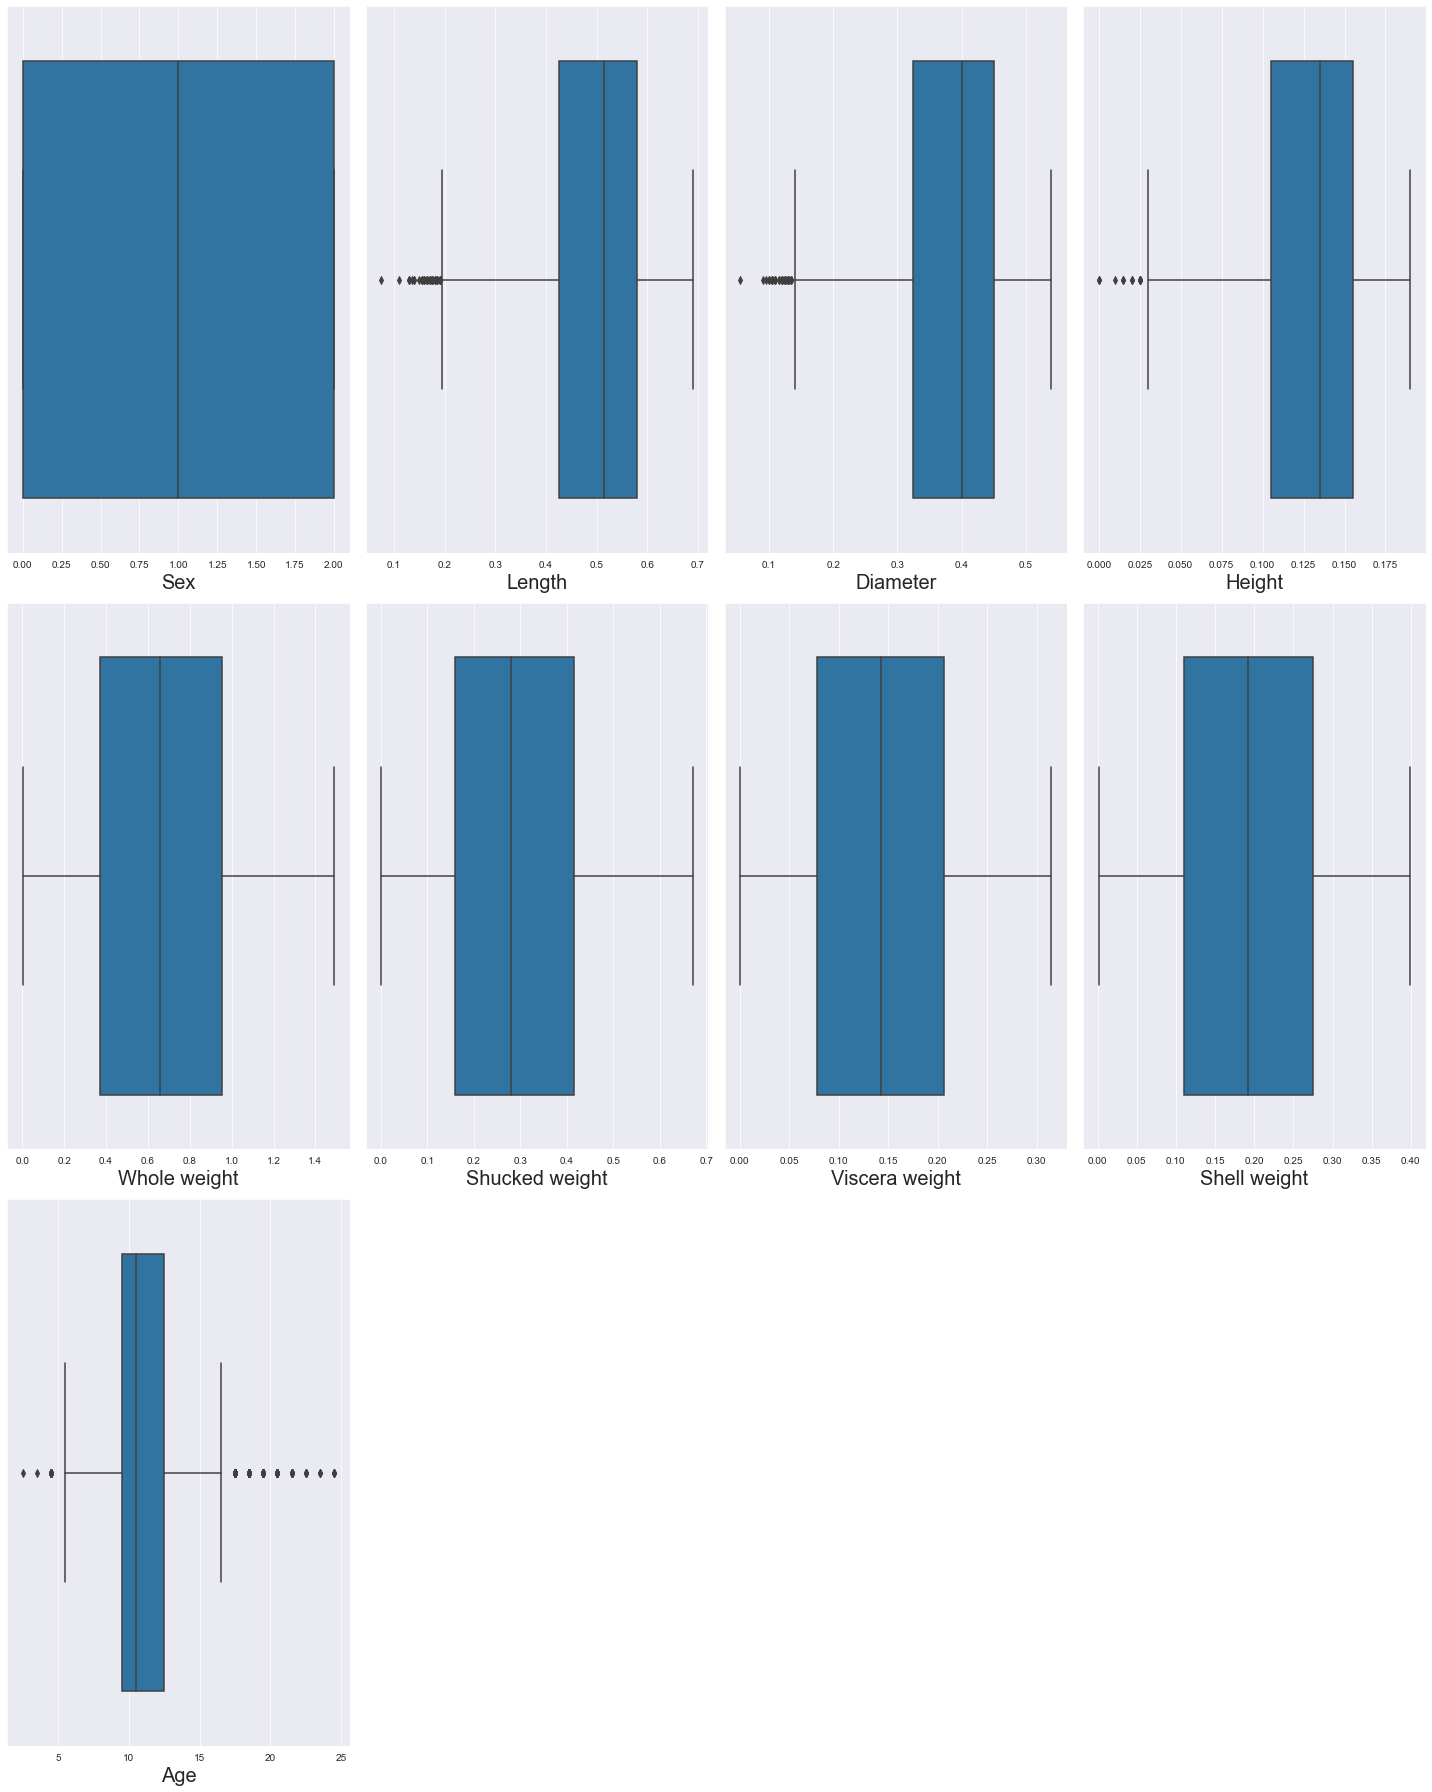

In [143]:
#CHECKING AGAIN WITH BOXPLOT

plt.figure(figsize=(20,25))

plotnumber=1

for column in data_cleaned:
    if plotnumber<=12 : 
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(data_cleaned[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Now data seems to be fine with less outliers so we are good to go 


In [187]:
# Splitting Data into training and testing


x = data_cleaned.drop(columns=['Age'])
y = data_cleaned['Age']

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.30 , random_state = 360) 



In [192]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(max_features=8, max_leaf_nodes=400, random_state = 360)
model_DT.fit(x_train, y_train)

DecisionTreeRegressor(max_features=8, max_leaf_nodes=400, random_state=360)

In [194]:
model_DT.score(x_train,y_train)

0.9160920148568542

Hyperparameter Tuning

In [215]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10,15,30, None], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [100,200]}

In [216]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [217]:
g_search.fit(x_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}


In [224]:
#Saving Model
import pickle
with open("g_search.pkl", "wb") as f:
    pickle.dump(model, f)